## Contribution to W. Olson review paper

### Version 3: Updates to Figure 3

Figure 3: slide v. Twist and Roll scatters + 3-sigma contours in 4-by-4 grid for all (a) internal CA and (b) internal AC tetramers
- already made in the past
    - crispen the edges, improve clarity and coloring for figures
- side figure: compare GCAT and TACG side-by-side

Objectives: improvements & fine-tuning for publication


In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.offsetbox import AnchoredText

path = os.getcwd()

/tmp/ipykernel_11678/810075742.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, );     Input data.
    ax : matplotlib.axes.Axes;          The axes object to draw the ellipse into.
    n_std : float;                      The number of standard deviations to determine the ellipse's radiuses.
    **kwargs;                           Forwarded to `~matplotlib.patches.Ellipse`
    Returns                             matplotlib.patches.Ellipse
    -------
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov     = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    # Using a special case to obtain the eigenvalues of this two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from the squareroot of the variance and multiplying with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


## Figure 3

make a 4x4 figure based on the 10|16 tetramers with respect to central dimer

In [3]:
X  = "slide"
Y1 = "twist"
Y2 = "roll"

# omitted for draft 1
#color_dict = {Y1:"tab:green", Y2:"tab:red"}

TETRAMER_LST = [
    'AAAA','AACA','AAGA','AATA','ACAA','ACGA','AGAA','AGCA','AGGA','ATAA',
    'AAAC','AACC','AAGC','AATC','ACAC','ACGC','AGAC','AGCC','AGGC','ATAC',
    'AAAG','AACG','AAGG','AATG','ACAG','ACGG','AGAG','AGCG','AGGG','ATAG',
    'AAAT','AACT','AAGT','AATT','ACAT','ACGT','AGAT','AGCT','AGGT','ATAT',
    'CAAA','CACA','CAGA','CATA','CCAA','CCGA','CGAA','CGCA','CGGA','CTAA',
    'CAAC','CACC','CAGC','CCAC','CGAC','CGGC','CAAG','CACG','CAGG','CATG',
    'CCAG','CCGG','CGAG','CGCG','CGGG','CTAG','CAAT','CACT','CAGT','CCAT',
    'CGAT','CGGT','GAAA','GACA','GAGA','GATA','GCAA','GCGA','GGAA','GGCA',
    'GGGA','GTAA','GAAC','GACC','GAGC','GATC','GCAC','GCGC','GGAC','GGCC',
    'GGGC','GTAC','GAAG','GACG','GAGG','GATG','GCAG','GCGG','GGAG','GGCG',
    'GGGG','GTAG','GAAT','GACT','GAGT','GCAT','GGAT','GGGT','TAAA','TACA',
    'TAGA','TATA','TCAA','TCGA','TGAA','TGCA','TGGA','TTAA','TAAC','TACC',
    'TAGC','TCAC','TGAC','TGGC','TAAG','TACG','TAGG','TCAG','TGAG','TGGG',
    'TAAT','TACT','TAGT','TCAT','TGAT','TGGT'
]


In [4]:
tet_dataset  = pd.read_csv("datafiles/czapla2022_3sig_tet", index_col=0)

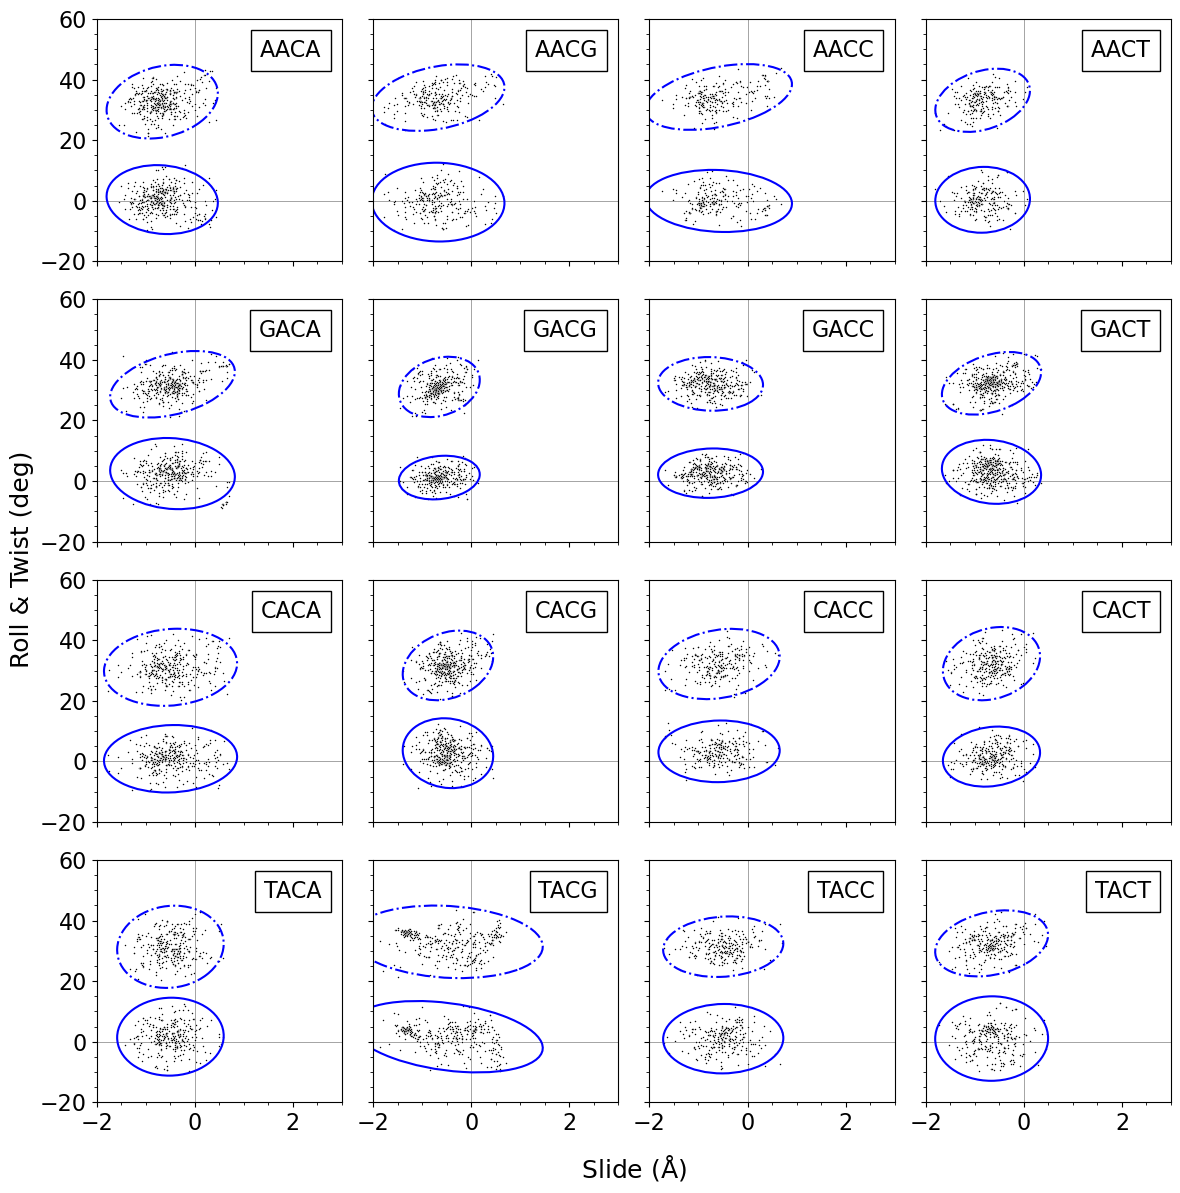

<Figure size 640x480 with 0 Axes>

In [15]:
dim   = "AC"

fig, axes = plt.subplots(4,4,figsize=(12,12), sharex='col', sharey='row')
pltdf     = tet_dataset[tet_dataset.step_dimer==dim][["slide","twist","roll","step_tetramer"]].copy().reset_index(drop=True)

bases     = ['A','G','C','T']
axes_dict = {bases[i]+dim+bases[j]:[i, j] for i in range(len(bases)) for j in range(len(bases))}
tetlen16  = False
tet_lst   = [bases[i]+dim+bases[j] for i in range(len(bases)) for j in range(len(bases))]
if len( [i for i in tet_lst if i in TETRAMER_LST] ) == 16:
    tetlen16 = True

for i in range(0, 4):
    for j in range(0, 4):
        tetstep = bases[i]+dim+bases[j]
        if tetstep in TETRAMER_LST:
            sns.scatterplot(data=pltdf.loc[pltdf.step_tetramer==tetstep], 
                            x=X, y=Y1, 
                            legend=False,
                            marker='.', s=5, color='black',
                            ax=axes[i, j])
            sns.scatterplot(data=pltdf.loc[pltdf.step_tetramer==tetstep], 
                            x=X, y=Y2, 
                            legend=False,
                            marker='.', s=5, color='black',
                            ax=axes[i, j])

            confidence_ellipse(pltdf.loc[pltdf.step_tetramer==tetstep][X],
                               pltdf.loc[pltdf.step_tetramer==tetstep][Y1],
                               axes[i, j], 
                               n_std=3,
                               label=None,
                               edgecolor="blue", linestyle='-.', linewidth=1.5, zorder=1)
            confidence_ellipse(pltdf.loc[pltdf.step_tetramer==tetstep][X],
                               pltdf.loc[pltdf.step_tetramer==tetstep][Y2],
                               axes[i, j], 
                               n_std=3,
                               label=None,
                               edgecolor="blue", linestyle='-', linewidth=1.5, zorder=1)

            at = AnchoredText(tetstep, prop=dict(size=16), frameon=True, loc='upper right')
            at.patch.set_boxstyle("square,pad=0.")
            axes[i, j].add_artist(at)
            axes[i, j].set(ylim=(-20,60), xlim=(-2,3))
            axes[i, j].set(xlabel='', ylabel='')
            axes[i, j].tick_params(axis="both", labelsize=16)
            axes[i, j].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(20))
            axes[i, j].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(5))
            axes[i, j].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2))
            axes[i, j].xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.5))
            #axes[i, j].set(xlabel='Slide ($\AA$)', ylabel='Step Angle ($^\circ$)')
            axes[i, j].axhline(y=0, color="grey", linewidth=0.5, zorder=0)
            axes[i, j].axvline(x=0, color="grey", linewidth=0.5, zorder=0) 
            del at
        del tetstep
        
if tetlen16 == False:
    fig.delaxes(axes[3][1])
    fig.delaxes(axes[2][2])
    fig.delaxes(axes[3][2])
    fig.delaxes(axes[1][3])
    fig.delaxes(axes[2][3])
    fig.delaxes(axes[3][3])

fig.supxlabel("            Slide ($\mathrm{\AA}$)", fontsize=18)
fig.supylabel("         Roll & Twist (deg)", fontsize=18)

plt.tight_layout()
plt.savefig("Figure3_"+dim+"_v04.png", dpi=500)
plt.show()
plt.clf()

del bases, axes_dict, tet_lst, tetlen16  
del pltdf, dim

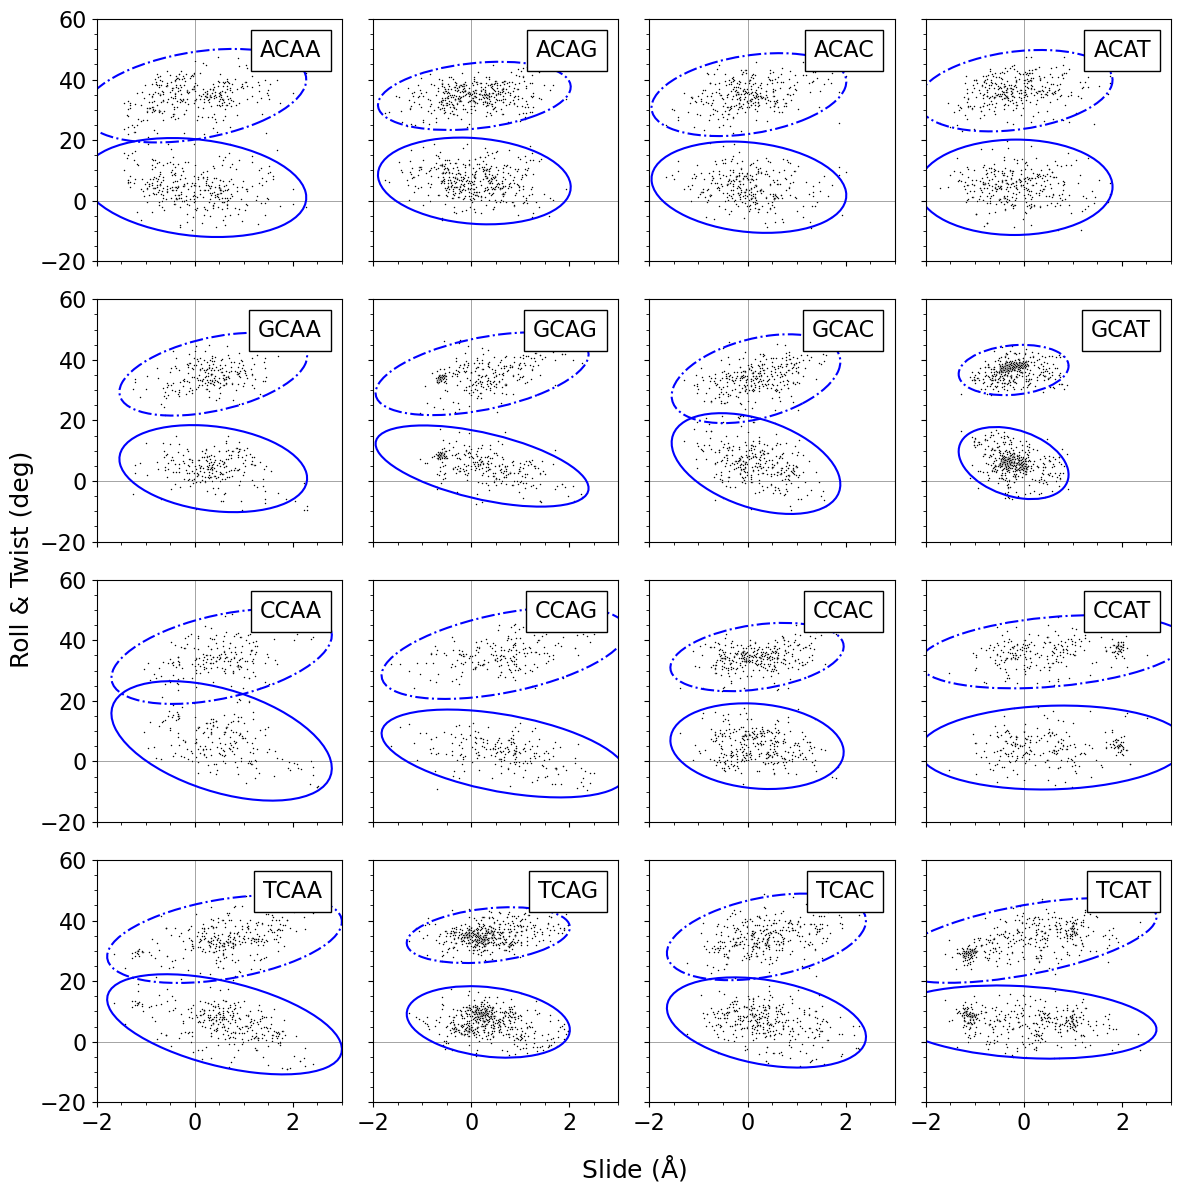

<Figure size 640x480 with 0 Axes>

In [18]:
dim   = "CA"

fig, axes = plt.subplots(4,4,figsize=(12,12), sharex='col', sharey='row')
pltdf     = tet_dataset[tet_dataset.step_dimer==dim][["slide","twist","roll","step_tetramer"]].copy().reset_index(drop=True)

bases     = ['A','G','C','T']
axes_dict = {bases[i]+dim+bases[j]:[i, j] for i in range(len(bases)) for j in range(len(bases))}
tetlen16  = False
tet_lst   = [bases[i]+dim+bases[j] for i in range(len(bases)) for j in range(len(bases))]
if len( [i for i in tet_lst if i in TETRAMER_LST] ) == 16:
    tetlen16 = True

for i in range(0, 4):
    for j in range(0, 4):
        tetstep = bases[i]+dim+bases[j]
        if tetstep in TETRAMER_LST:
            sns.scatterplot(data=pltdf.loc[pltdf.step_tetramer==tetstep], 
                            x=X, y=Y1, 
                            legend=False,
                            marker='.', s=5, color='black',
                            ax=axes[i, j])
            sns.scatterplot(data=pltdf.loc[pltdf.step_tetramer==tetstep], 
                            x=X, y=Y2, 
                            legend=False,
                            marker='.', s=5, color='black',
                            ax=axes[i, j])

            confidence_ellipse(pltdf.loc[pltdf.step_tetramer==tetstep][X],
                               pltdf.loc[pltdf.step_tetramer==tetstep][Y1],
                               axes[i, j], 
                               n_std=3,
                               label=None,
                               edgecolor="blue", linestyle='-.', linewidth=1.5, zorder=1)
            confidence_ellipse(pltdf.loc[pltdf.step_tetramer==tetstep][X],
                               pltdf.loc[pltdf.step_tetramer==tetstep][Y2],
                               axes[i, j], 
                               n_std=3,
                               label=None,
                               edgecolor="blue", linestyle='-', linewidth=1.5, zorder=1)

            at = AnchoredText(tetstep, prop=dict(size=16), frameon=True, loc='upper right')
            at.patch.set_boxstyle("square,pad=0.")
            axes[i, j].add_artist(at)
            axes[i, j].set(ylim=(-20,60), xlim=(-2,3))
            axes[i, j].set(xlabel='', ylabel='')
            axes[i, j].tick_params(axis="both", labelsize=16)
            axes[i, j].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(20))
            axes[i, j].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(5))
            axes[i, j].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2))
            axes[i, j].xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.5))
            #axes[i, j].set(xlabel='Slide ($\AA$)', ylabel='Step Angle ($^\circ$)')
            axes[i, j].axhline(y=0, color="grey", linewidth=0.5, zorder=0)
            axes[i, j].axvline(x=0, color="grey", linewidth=0.5, zorder=0) 
            del at
        del tetstep
        
if tetlen16 == False:
    fig.delaxes(axes[3][1])
    fig.delaxes(axes[2][2])
    fig.delaxes(axes[3][2])
    fig.delaxes(axes[1][3])
    fig.delaxes(axes[2][3])
    fig.delaxes(axes[3][3])

fig.supxlabel("            Slide ($\mathrm{\AA}$)", fontsize=18)
fig.supylabel("         Roll & Twist (deg)", fontsize=18)


plt.tight_layout()
plt.savefig("Figure3_"+dim+"_v04.png", dpi=500)
plt.show()
plt.clf()

del bases, axes_dict, tet_lst, tetlen16  
del pltdf, dim

In [27]:
del X, Y1, Y2, TETRAMER_LST#, color_dict
del tet_dataset

## Document Details
Author: Robert Young, PhD
